In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import matplotlib.image as mpimg
from subprocess import Popen
import glob,os,time,sys,math,shutil
import numpy as np
import re
import pandas as pd
from IPython.display import display,clear_output
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams
import seaborn as sns
import matplotlib as mpl
from scipy.stats import gaussian_kde,kde,ks_2samp,entropy
timestr=time.strftime("%m%d")
from matplotlib import colormaps
import warnings
warnings.filterwarnings('ignore')

In [4]:
stdsalt_drug_files=glob.glob('/home/smriti/BigStorage/figs_movies_KMC/send_worknew/SE-DMU--4.5_Rmudrug--10.1_kd-0.0001/*dat')
print(len(stdsalt_drug_files))
df=pd.read_csv(stdsalt_drug_files[0])
print(df.columns)

224
Index(['sweep', 'seed', 'seconds', 'epsilon', 'kappa', 'kappaPhi', 'theta0',
       'theta1', 'gb0', 'mu', 'dmu', 'dg', 'theta2', 'energy',
       'binding_energy', 'Nv5', 'Nv6', 'NAB', 'NAB_in', 'NCD_Hex', 'NCD_other',
       'NVin', 'Nhein', 'NCD_T4_in', ' NCD_T3_in', 'NCD_T4', 'NCD_T3', 'Nv',
       'NE', 'Nsurf', 'Nboundary'],
      dtype='object')


In [10]:

def create_histogram_sim(bin_def,file_path,column_name):
    #bin2=[100+50*x for x in range(20)]
    #data=np.loadtxt(outcomefile).T
    #data=np.loadtxt(file_path,delimiter=',',skiprows=1).T
    df=pd.read_csv(file_path)
    xx=np.asarray(df[column_name])
    #for each in data[-14]:
    #  xx.append(each)
    y,binEdges=np.histogram(xx,bins=bin_def)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    return bincenters,y/len(2*xx)


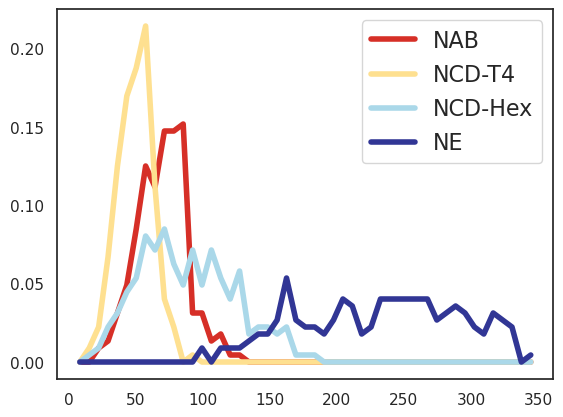

In [16]:
### exp vs simulation into two subplots
file_dire='/home/smriti/BigStorage/figs_movies_KMC/endfiles'
stdsalt_file=file_dire+'/stdsalt.dat'
sns.set_theme(style="white", palette=None)
markerarraystd=mpl.colormaps['RdYlBu'](np.linspace(0.1,1,16))
markerarrayhigh=mpl.colormaps['ocean'](np.linspace(0,1.0,3))
markerarraylow=mpl.colormaps['winter'](np.linspace(0.1,1,5))
myarrays = {
    "markerarraystd":markerarraystd,
    "markerarrayhigh":markerarrayhigh,
    "markerarraylow":markerarraylow,
}

bin_list=[5+7*x for x in range(50)]
bin_centers_AB,y_sim_std=create_histogram_sim(bin_list,stdsalt_file,'NAB')
bin_centers_CDt4,y_sim_stdCDt4=create_histogram_sim(bin_list,stdsalt_file,'NCD_T4')
bin_centers_CDHex,y_sim_stdCDHex=create_histogram_sim(bin_list,stdsalt_file,'NCD_Hex')
bin_centers_E,y_sim_stdE=create_histogram_sim(bin_list,stdsalt_file,'NE')

##########simulation assembly size distribution at different salt concentrations#####
plt.plot(bin_centers_AB,y_sim_std,linewidth=4,color=markerarraystd[0],label=fr'NAB')
plt.plot(bin_centers_CDt4,y_sim_stdCDt4,linewidth=4,color=markerarraystd[5],label=fr'NCD-T4')
plt.plot(bin_centers_CDHex,y_sim_stdCDHex,linewidth=4,color=markerarraystd[10],label=fr'NCD-Hex')
plt.plot(bin_centers_E,y_sim_stdE,linewidth=4,color=markerarraystd[15],label=fr'NE')
plt.legend(fontsize=16)


25
25
311.44068
204.16667
204.16667


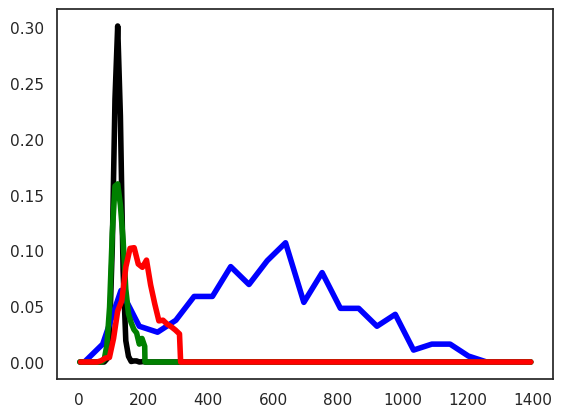

In [ ]:

plt.savefig('assembly_size_exp.png')
plt.savefig('assembly_size_exp.')

(3, 128)
(3, 128)
(3, 128)


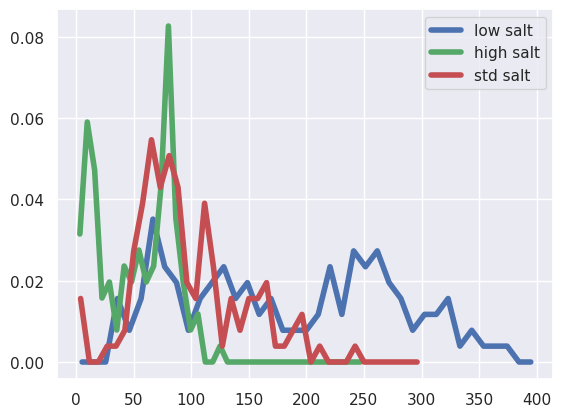

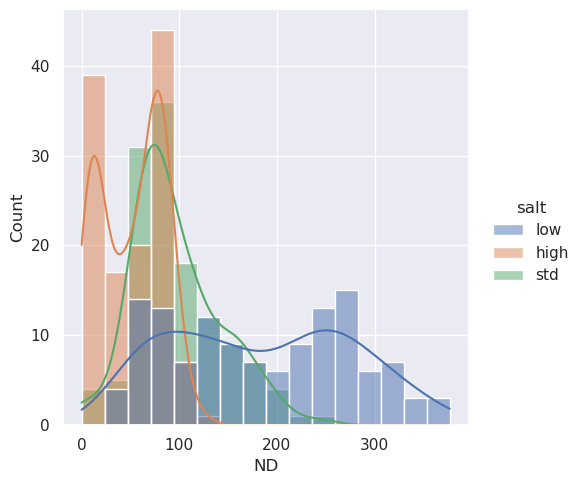

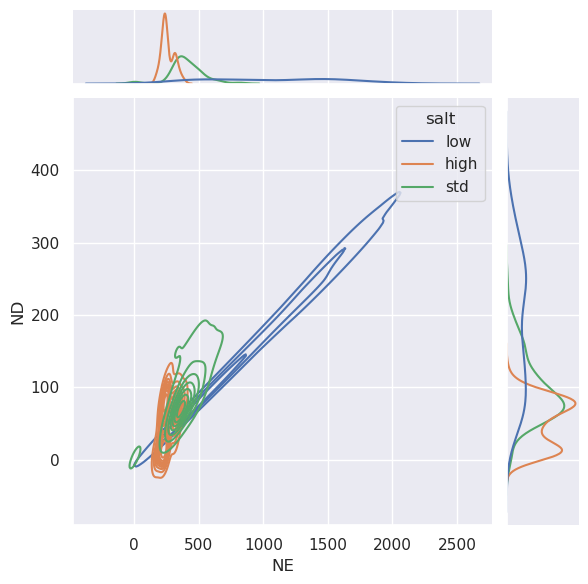

In [59]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter
sns.set_theme()
def create_histogram_drug(bin_def,file_path):
    #bin2=[100+50*x for x in range(20)]
    #data=np.loadtxt(outcomefile).T
    data=np.loadtxt(file_path,delimiter=' ').T
    print(data.shape)
    xx=[]
    for each in data[-1]:
     if 0<each:
       xx.append(each)
    y,binEdges=np.histogram(xx,bins=bin_def)
    bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
    return bincenters,y/len(2*xx)
files_low_salt_drug='../new_runs_2025/nd_calc/lowsalt_nd.dat'
files_high_salt_drug='../new_runs_2025/nd_calc/highsalt_nd.dat'
files_std_salt_drug='../new_runs_2025/nd_calc/stdsalt_nd.dat'
bin_def_low=np.linspace(0,400,40)
bin_def_high=np.linspace(0,250,40)
bin_def_std=np.linspace(0,300,40)
bin_centers_low,y_low=create_histogram_drug(bin_def_low,files_low_salt_drug)
bin_centers_high,y_high=create_histogram_drug(bin_def_high,files_high_salt_drug)
bin_centers_std,y_std=create_histogram_drug(bin_def_std,files_std_salt_drug)
plt.plot(bin_centers_low,y_low,linewidth=4,color='b',label=fr'low salt')
plt.plot(bin_centers_high,y_high,linewidth=4,color='g',label=fr'high salt')
plt.plot(bin_centers_std,y_std,linewidth=4,color='r',label=fr'std salt')
plt.legend()
plt.show()



df_low_salt_drug=pd.read_csv(files_low_salt_drug,delim_whitespace=True,header=None)
df_low_salt_drug.columns=['SWEEP','NE','ND']
df_high_salt_drug=pd.read_csv(files_high_salt_drug,delim_whitespace=True,header=None)
df_high_salt_drug.columns=['SWEEP','NE','ND']
df_std_salt_drug=pd.read_csv(files_std_salt_drug,delim_whitespace=True,header=None)
df_std_salt_drug.columns=['SWEEP','NE','ND']
for i in range(len(df_low_salt_drug)):
  df_low_salt_drug['salt']='low'
for i in range(len(df_high_salt_drug)):
  df_high_salt_drug['salt']='high'
for i in range(len(df_std_salt_drug)):
  df_std_salt_drug['salt']='std'
df_all_salt=pd.concat([df_low_salt_drug,df_high_salt_drug,df_std_salt_drug])
axs=sns.displot(data=df_all_salt,x='ND',hue='salt',kde=True)
plt.show()
sns.jointplot(
    data=df_all_salt,
    x="NE", y="ND", hue="salt",
    kind="kde",linewidth=4
)









0.1297484282121007
-15
0.1297484282121007
0.1297484282121007
[0.15294118 0.39215686 0.09803922 1.        ]


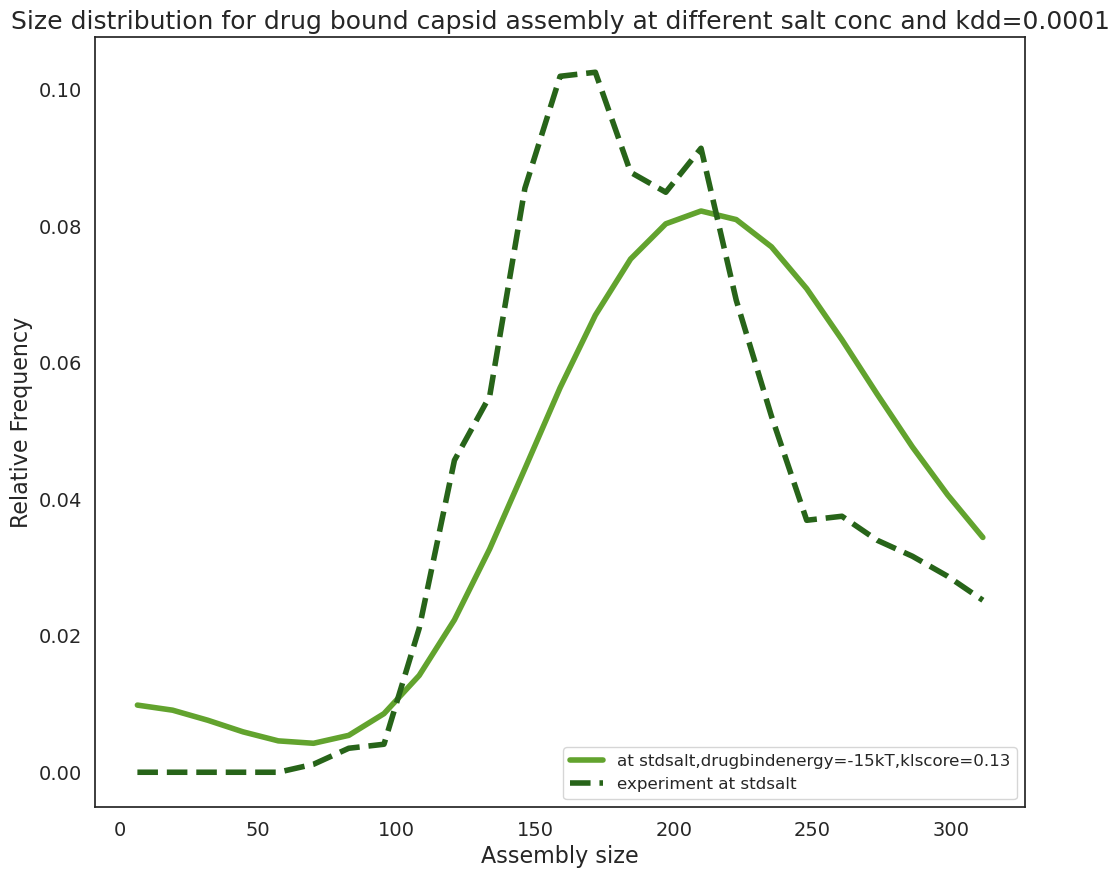

In [ ]:
###subplots 3 salts with exp vs simulation

file_dire='/home/smriti/BigStorage/figs_movies_KMC/new_runs_2025/allEnergyFiles'
sns.set_theme(style="white", palette=None)
markerarraystd=mpl.colormaps['PiYG'](np.linspace(0,1,15))
markerarrayhigh=mpl.colormaps['ocean'](np.linspace(0,0.5,3))
markerarraylow=mpl.colormaps['winter'](np.linspace(0.1,1,5))
myarrays = {
    "markerarraystd":markerarraystd,
    "markerarrayhigh":markerarrayhigh,
    "markerarraylow":markerarraylow,
}

low_salt_file=file_dire+'/SE-DMU--5.5_Rgdrug--17_kd-0.0001.dat'
moderate_salt_file=file_dire+'/SE-DMU--4.5_Rgdrug--15_kd-0.0001.dat'
high_salt_file=file_dire+'/SE-DMU--4.5_Rgdrug--13_kd-0.0001.dat'
salt_files=[low_salt_file,moderate_salt_file,high_salt_file]
#saltnames=['low','high','std']
saltnames=['low','std','high']
conf_energy=['5.5','4.5','3.5']
#conf_energy=['5.5','3.5','4.5']
bind_energy=['-17','-15','-13']
fig, axs=plt.subplots(2,2,figsize=(10,8))

for i in range(1,2):
    file_name=salt_files[i]
    bincenters_exp,sim_salt_dist,relative_exp_counts,colorpalette,klscore= \
    size_distribution_plot_single([file_name],saltnames[i],conf_energy[i])
    colorpalette=myarrays[str(colorpalette)]
    print(klscore)
    print(colorpalette[-1])
    plt.plot(bincenters_exp,sim_salt_dist,linewidth=4,label=f'at {saltnames[i]}salt,drugbindenergy={bind_energy[i]}kT,klscore={np.round(klscore,2)}',color=colorpalette[12*i])
    plt.plot(bincenters_exp,relative_exp_counts,linestyle='--',color=colorpalette[-1],label=f'experiment at {saltnames[i]}salt',linewidth=4)
plt.xlabel('Assembly size',fontsize=16)
plt.ylabel('Relative Frequency',fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Size distribution for drug bound capsid assembly at different salt conc and kdd=0.0001' ,fontsize=18)
plt.savefig('final_distribution.png')



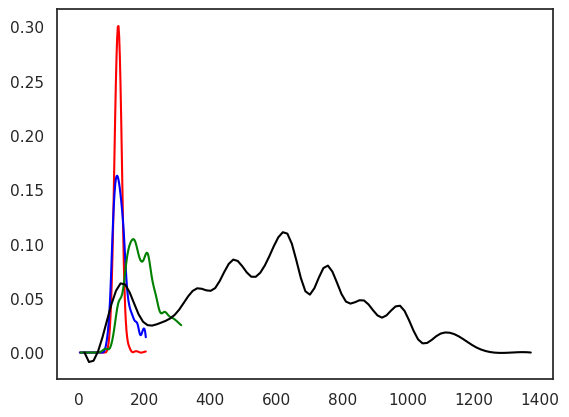

In [419]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
from scipy.interpolate import interp1d
# Example binned data (bin edges and relative counts)
#bin_edges = np.array([0, 1, 2, 3, 4, 5])  # Define bin edges
#relative_counts = np.array([0.1, 0.2, 0.3, 0.25, 0.15])  # Example relative frequencies
bin_centers_std=df_experiment['# dimers_t4std']
relative_counts_std=df_experiment['counts_t4std']
pdf_binned_std = relative_counts_std / np.sum(relative_counts_std)
bin_centers_highsalt=df_experiment['# dimers_highsalt']
relative_counts_highsalt=df_experiment['counts_highsalt']
pdf_binned_highsalt = relative_counts_highsalt / np.sum(relative_counts_highsalt)
bin_centers_std_salt=df_experiment['# dimers_stdsalt']
relative_counts_std_salt=df_experiment['counts_stdsalt']
pdf_binned_std_salt = relative_counts_std_salt / np.sum(relative_counts_std_salt)
bin_centers_lowsalt=df_experiment['# dimers_lowsalt']
relative_counts_lowsalt=df_experiment['counts_lowsalt']
pdf_binned_lowsalt = relative_counts_lowsalt / np.sum(relative_counts_lowsalt)
interp_pdf = interp1d(bin_centers_std, pdf_binned_std, kind="cubic", fill_value="extrapolate")
x_fine = np.linspace(min(bin_centers_std), max(bin_centers_std), 100)
pdf_fine_std = interp_pdf(x_fine)
plt.plot(x_fine, pdf_fine_std, label="Interpolated t4std Distribution", color="red")
interp_pdf = interp1d(bin_centers_highsalt, pdf_binned_highsalt, kind="cubic", fill_value="extrapolate")
x_fine = np.linspace(min(bin_centers_highsalt), max(bin_centers_highsalt), 100)
pdf_fine_highsalt = interp_pdf(x_fine)
plt.plot(x_fine, pdf_fine_highsalt, label="Interpolated highsalt Distribution", color="blue")
interp_pdf = interp1d(bin_centers_std_salt, pdf_binned_std_salt, kind="cubic", fill_value="extrapolate")
x_fine = np.linspace(min(bin_centers_std_salt), max(bin_centers_std_salt), 100)
pdf_fine_std_salt = interp_pdf(x_fine)
plt.plot(x_fine, pdf_fine_std_salt, label="Interpolated stdsalt Distribution", color="green")
interp_pdf = interp1d(bin_centers_lowsalt, pdf_binned_lowsalt, kind="cubic", fill_value="extrapolate")
x_fine = np.linspace(min(bin_centers_lowsalt), max(bin_centers_lowsalt), 100)
pdf_fine_lowsalt = interp_pdf(x_fine)
plt.plot(x_fine, pdf_fine_lowsalt, label="Interpolated lowsalt Distribution", color="black")   
# Example raw data distribution



In [2]:
def calc_mean(df):
    avg_NE=df['NE'].sum()/(len(df))
    return avg_NE
def calc_varianvce(df):
    var_NE=df['NE'].var()
    return var_NE
def calc_std(df):
    std_NE=df['NE'].std()
    return std_NE
def calc_rmse_meanNE(df):
    return calc_std(df)/(np.sqrt(len(df.shape[0])))
def T4_count(df):
    if len(df['NE'])==0:
        count_T4=0
    else:
        count_T4=df['NE'].value_counts().get(120, 0)/len(df['NE'])
    return count_T4
def Ncurv(df):
    df['ncurv']=df['NAB'].div(df['NE'])
    return df['ncurv'].mean()
def NCD_Hex_mean(df):
    df['NCD']=df['NCD_T4']+df['NCD_T3']+df['NCD_Hex']
    df['NCD_ratio']=df['NCD_Hex'].div(df['NCD'])
    return df['NCD_ratio'].mean()
def NCD_Hex_std(df):
    df['NCD']=df['NCD_T4']+df['NCD_T3']+df['NCD_Hex']
    df['NCD_ratio']=df['NCD_Hex'].div(df['NCD'])
    return df['NCD_ratio'].std()
def T3_count(df):
    count_T3=df['NE'].value_counts().get(90, 0)/len(df['NE'])
    return count_T3

In [4]:
filenames_all=glob.glob("/scratch/09816/smritipradhan/start_pack/allEnergyFiles/*dat")
#print(filenames_all)
plot_heatdata=pd.DataFrame(columns=["gdrug", "kd", "NE_variable"])
for file in filenames_all:
    #print(file)
    paras=file.split("3.5_Rgdrug-")[1]
    #print(paras)
    gdrug=paras.split("_")[0]
    datafile0=pd.read_csv(file)
    #print(datafile0['NE'].iloc[i].type)
    datafile0=datafile0.drop(datafile0[datafile0['NE']==3].index)
    print(datafile0['NE'].dtype)
    kd=paras.split('kd-')[1]
    #print(kd)
    kd_final=kd.split(".dat")[0]
    #print(sum)
    #print(datafile0.head())
    mean_edge=calc_mean(datafile0)
    #print(mean_edge/len(datafile0))
    mean_NE_std=calc_std(datafile0)
    NCD_hexratio=NCD_Hex_mean(datafile0)
    t4percent=T4_count(datafile0)
    new_row = [[float(gdrug),float(kd_final),mean_edge]]
    nr=pd.DataFrame(new_row,columns=['gdrug', "kd",'NE_variable'])
    plot_heatdata = pd.concat([plot_heatdata,nr], ignore_index=True)
print(plot_heatdata.head())
#plot_heatdata=plot_heatdata.groupby('kd').agg({'NE_variable':'mean'}).reset_index()
print(plot_heatdata)
plot_linearkd=plot_heatdata.groupby('kd').agg({'NE_variable':'mean'}).reset_index()
plot_lineargb=plot_heatdata.groupby('gdrug').agg({'NE_variable':'mean'}).reset_index()




NameError: name 'glob' is not defined

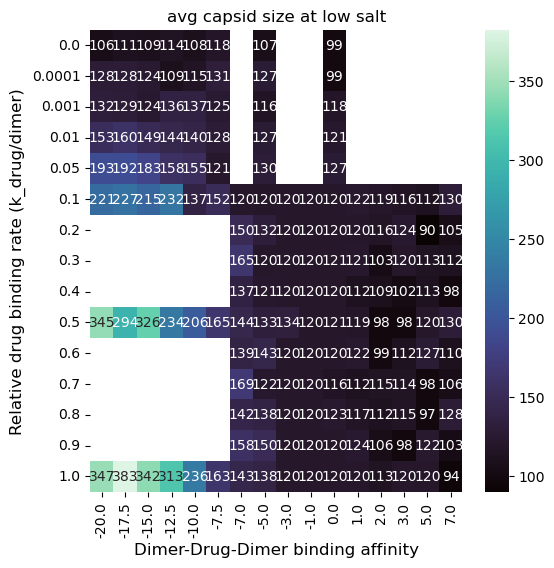

In [8]:
#plot_heatdata['kd']=plot_heatdata['gdrug']
#print(plot_heatdata)
glue = plot_heatdata.pivot(index="kd", columns="gdrug", values="NE_variable")
fig = plt.figure(figsize=(6, 6))
ax=plt.axes()
sns.heatmap(glue,ax=ax,xticklabels=1, yticklabels=1,annot=True,annot_kws={"fontsize":10},fmt='.0f',cmap='mako')
ax.set_title('avg capsid size at low salt',fontsize=12)
ax.set_ylabel('Relative drug binding rate (k_drug/dimer)',fontsize=12)
ax.set_xlabel('Dimer-Drug-Dimer binding affinity',fontsize=12)
plt.savefig('std_dev_std_salt.png')


In [23]:
stdsaltfiles=glob.glob("/scratch/09816/smritipradhan/low_salt/allEnergyFiles/*kd-0.8*.dat")
def obtain_plot_df(filelist,conf_energy):
    plot_highdata=pd.DataFrame(columns=["gdrug", "kd", "edgemean","calcstd","edgestd","t4ratio","NCDHexratio","NCDHexstd","Ncurv"])
    for file in filelist:
        paras=file.split(str(conf_energy)+"_Rgdrug-")[1]
    #print(paras)
        gdrug=paras.split("_")[0]
        datafile0=pd.read_csv(file)
    #print(datafile0['NE'].iloc[i].type)
    #datafile0=datafile0.drop(datafile0[datafile0['NE']==3].index)
        kd=paras.split('kd-')[1]
    #print(kd)
        kd_final=kd.split(".dat")[0]
        mean_edge=calc_mean(datafile0)
        mean_NE_std=calc_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
        NCD_hexratio=NCD_Hex_mean(datafile0)
        NCD_hexratiostd=NCD_Hex_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
        t4percent=T4_count(datafile0)
        calc_std2=calc_std(datafile0)
        curvature=Ncurv(datafile0)
        new_row = [[float(gdrug),float(kd_final),mean_edge,calc_std2,mean_NE_std,t4percent,NCD_hexratio,NCD_hexratiostd,curvature]]
        nr=pd.DataFrame(new_row,columns=['gdrug', "kd",'edgemean', "calcstd",'edgestd','t4ratio','NCDHexratio','NCDHexstd','Ncurv'])
        plot_highdata = pd.concat([plot_highdata,nr], ignore_index=True)
    return plot_highdata
plot_highdata=obtain_plot_df(stdsaltfiles,5.5)


/tmp/ipykernel_37573/2353412774.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_highdata = pd.concat([plot_highdata,nr], ignore_index=True)


In [26]:
def plot_dataframe(plot_highdata,xvariable,markerarraystd,labelname):
    plot_highdata=plot_highdata.sort_values(str(xvariable))


#axs[0].set_xscale('symlog')
    axs[0,0].scatter(plot_highdata[str(xvariable)],plot_highdata['edgemean'],color=markerarraystd,alpha=1.0)
    #axs[0,0].errorbar(plot_highdata[str(xvariable)],plot_highdata['edgemean'],yerr=plot_highdata['edgestd'],fmt='',marker='',linestyle='',color=markerarraystd[0],alpha=0.5)
    axs[0,0].plot(plot_highdata[str(xvariable)],plot_highdata['edgemean'],color=markerarraystd[2],linestyle='--',alpha=0.6,label=str(labelname))
    axs[0,0].set_title('NE average')
    axs[0,1].scatter(plot_highdata[str(xvariable)],plot_highdata['calcstd'],color=markerarraystd,alpha=1.0)
    axs[0,1].plot(plot_highdata[str(xvariable)],plot_highdata['calcstd'],color=markerarraystd[2],linestyle='--',alpha=0.6,label=str(labelname))
    axs[0,1].set_title('NE standard deviation')
    axs[1,0].scatter(plot_highdata[str(xvariable)],plot_highdata['t4ratio'],color=markerarraystd,alpha=1.0)
    axs[1,0].plot(plot_highdata[str(xvariable)],plot_highdata['t4ratio'],color=markerarraystd[2],linestyle='--',alpha=0.6,label=str(labelname))
    axs[1,0].set_title('T=4 ratio trajectories')
    axs[1,1].scatter(plot_highdata[str(xvariable)],plot_highdata['Ncurv'],color=markerarraystd,alpha=1.0)
    #axs[1,1].errorbar(plot_highdata['gdrug'],plot_highdata['NCDHexratio'],yerr=plot_highdata['NCDHexstd'],fmt='',marker='',linestyle='',color='r',alpha=0.5)
    axs[1,1].plot(plot_highdata[str(xvariable)],plot_highdata['Ncurv'],color=markerarraystd[0],linestyle='--',alpha=0.6,label=str(labelname))
    axs[1,1].set_title('Curvature of shell')




/tmp/ipykernel_37573/2353412774.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_highdata = pd.concat([plot_highdata,nr], ignore_index=True)
/tmp/ipykernel_37573/2353412774.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_highdata = pd.concat([plot_highdata,nr], ignore_index=True)
/tmp/ipykernel_37573/2353412774.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-

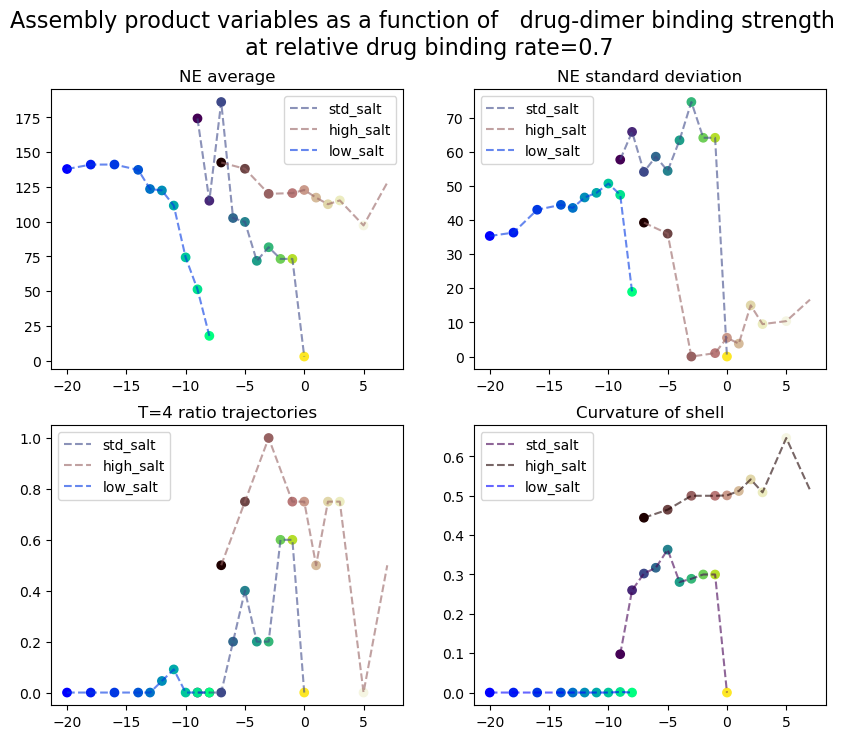

In [29]:
markerarraystd=mpl.colormaps['viridis'](np.linspace(0,1,10))
markerarrayhigh=mpl.colormaps['pink'](np.linspace(0,1,10))
markerarraylow=mpl.colormaps['winter'](np.linspace(0,1,10))

markers = ["d", "v", "s", "*", "^", "d", "v", "s", "*", "^"]
fig, axs=plt.subplots(2,2,figsize=(10,8))
fig.suptitle(f'Assembly product variables as a function of   drug-dimer binding strength \n at relative drug binding rate={0.7}',fontsize=16)
std_salt=glob.glob("/scratch/09816/smritipradhan/std_salt/allEnergyFiles/*kd-0.8*.dat")
plot_std_salt=obtain_plot_df(std_salt,4.5)
high_salt=glob.glob("/scratch/09816/smritipradhan/start_pack/allEnergyFiles/*kd-0.8*.dat")
plot_high_salt=obtain_plot_df(high_salt,3.5)
low_salt=glob.glob("/scratch/09816/smritipradhan/low_salt/allEnergyFiles/*kd-0.8*.dat")
plot_low_salt=obtain_plot_df(low_salt,5.5)
plot_dataframe(plot_std_salt,'gdrug',markerarraystd,'std_salt')
plot_dataframe(plot_high_salt,'gdrug',markerarrayhigh,'high_salt')
plot_dataframe(plot_low_salt,'gdrug',markerarraylow,'low_salt')
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
plt.savefig('binding_affinity.png')

In [5]:
filenames_all=glob.glob("stdsalt/*dat")
#print(filenames_all)
plot_heatdata=pd.DataFrame(columns=["gdrug", "kd", "NE_variable"])
for file in filenames_all:
    paras=file.split("4.5_Rgdrug-")[1]
    gdrug=paras.split("_")[0]
    #print(gdrug)
    datafile0=pd.read_csv(file)
    datafile0=datafile0.drop(datafile0[datafile0['NE']<=3].index)
    kd=paras.split("-")[1]
    kd=kd.split(".dat")[0]
    #print(kd)
    mean_edge=calc_mean(datafile0)
    mean_NE_std=calc_std(datafile0)
    NCD_hexratio=NCD_Hex_mean(datafile0)
    t4percent=T4_count(datafile0)
    new_row = [[float(gdrug),float(kd),NCD_hexratio]]
    nr=pd.DataFrame(new_row,columns=['gdrug', "kd",'NE_variable'])
    plot_heatdata = pd.concat([plot_heatdata,nr], ignore_index=True)
print(plot_heatdata.head())
#plot_heatdata=plot_heatdata.groupby('gdrug').agg({'NE_variable':'mean'}).reset_index()
#print(plot_heatdata)



   gdrug    kd  NE_variable
0   1.10  0.70     0.784981
1   0.00  0.90     0.003939
2   0.30  0.90     0.008664
3   0.01  0.90     0.005698
4   1.10  0.01     0.266923


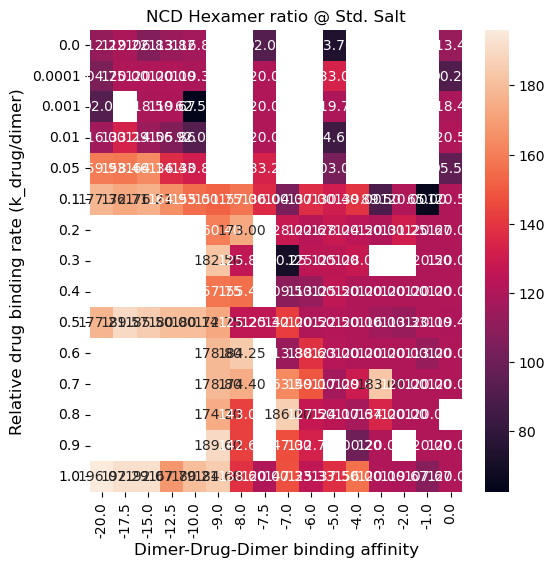

In [67]:


#plot_heatdata['kd']=plot_heatdata['gdrug']
#print(plot_heatdata)
glue = plot_heatdata.pivot(index="kd", columns="gdrug", values="NE_variable")
fig = plt.figure(figsize=(6, 6))
ax=plt.axes()
sns.heatmap(glue,ax=ax,xticklabels=1, yticklabels=1,annot=True,annot_kws={"fontsize":10},fmt='.2f')
ax.set_title('NCD Hexamer ratio @ Std. Salt',fontsize=12)
ax.set_ylabel('Relative drug binding rate (k_drug/dimer)',fontsize=12)
ax.set_xlabel('Dimer-Drug-Dimer binding affinity',fontsize=12)
plt.savefig('std_dev_std_salt.png')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-1.0.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-2.0.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.3.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.01.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.1.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.5.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.001.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.9.dat', 'highsalt/SE-DMU--3.5_Rgdrug-0.9_kd-0.7.dat']
128
128
128
128
128
128
128
128
128
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0
   gdrug     kd    edgemean    calcstd   edgestd   t4ratio  NCDHexratio  \
6    0.9  0.001  132.085938  26.105488  2.307421  0.632812     0.078459   
3    0.9  0.010  136.312500  39.102279  3.456186  0.773438     0.059752   
4    0.9  0.100  148.296875  52.567671  4.646370  0.679688     0.097004   
2    0.9  0.300  147.812500  48.324323  4.271307  0.632812     0.111081   
5    0.9  0.500  166.843750  57.747269  5.104186  0.453125     0.179554   

   NCDHexstd  
6   0.008952  
3   0.009526  


Text(0, 0.5, '$\\langle Ndimer \\rangle$')

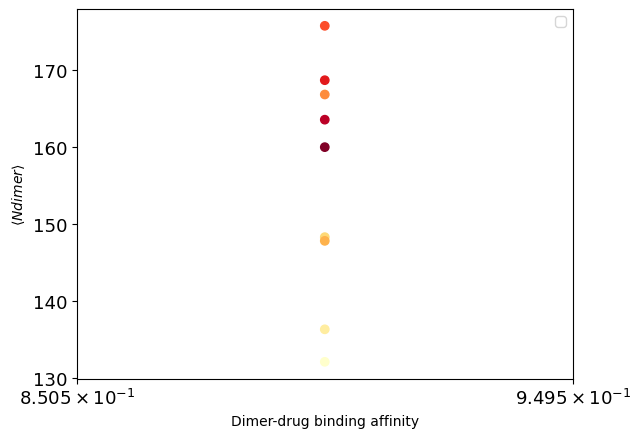

In [46]:
highsaltfiles=glob.glob("highsalt/*gdrug-0.9*.dat")
print(highsaltfiles)
stdsaltfiles=glob.glob("stdsalt/*gdrug-0.9*.dat")
plot_highdata=pd.DataFrame(columns=["gdrug", "kd", "edgemean","calcstd","edgestd","t4ratio","NCDHexratio","NCDHexstd"])
nassemble=[]
for file in highsaltfiles:
    paras=file.split("3.5_Rgdrug-")[1]
    gdrug=paras.split("_")[0]
    #print(gdrug)
    datafile0=pd.read_csv(file)
    datafile0=datafile0.drop(datafile0[datafile0['NE']<=3].index)
    kd=paras.split("-")[1]
    kd=kd.split(".dat")[0]
    #print(kd)
    mean_edge=calc_mean(datafile0)
    mean_NE_std=calc_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
    NCD_hexratio=NCD_Hex_mean(datafile0)
    NCD_hexratiostd=NCD_Hex_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
    print(len(datafile0['NE']))
    t4percent=T4_count(datafile0)
    calc_std2=calc_std(datafile0)
    new_row = [[float(gdrug),float(kd),mean_edge,calc_std2,mean_NE_std,t4percent,NCD_hexratio,NCD_hexratiostd]]
    nr=pd.DataFrame(new_row,columns=['gdrug', "kd",'edgemean', "calcstd",'edgestd','t4ratio','NCDHexratio','NCDHexstd'])
    plot_highdata = pd.concat([plot_highdata,nr], ignore_index=True)
    nassemble.append(len(datafile0['NE'])/128)
print(nassemble)
print(np.asarray(nassemble).mean())
plot_lowdata=pd.DataFrame(columns=["gdrug", "kd", "edgemean","calcstd","edgestd","t4ratio","NCDHexratio","NCDHexstd"])
#nassemble=nfiles+1
for file in stdsaltfiles:
    paras=file.split("4.5_Rgdrug-")[1]
    gdrug=paras.split("_")[0]
    #print(gdrug)
    datafile0=pd.read_csv(file)
    datafile0=datafile0.drop(datafile0[datafile0['NE']<=3].index)
    kd=paras.split("-")[1]
    kd=kd.split(".dat")[0]
    #print(kd)
    mean_edge=calc_mean(datafile0)
    mean_NE_std=calc_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
    NCD_hexratio=NCD_Hex_mean(datafile0)
    NCD_hexratiostd=NCD_Hex_std(datafile0)/(np.sqrt(len(datafile0['NE'])))
    t4percent=T4_count(datafile0)
    calc_std2=calc_std(datafile0)
    new_row = [[float(gdrug),float(kd),mean_edge,calc_std2,mean_NE_std,t4percent,NCD_hexratio,NCD_hexratiostd]]
    nr=pd.DataFrame(new_row,columns=['gdrug', "kd",'edgemean','calcstd','edgestd','t4ratio','NCDHexratio','NCDHexstd'])
    plot_lowdata= pd.concat([plot_lowdata,nr], ignore_index=True)
plt.xscale("symlog")
plot_lowdata=plot_lowdata.sort_values('kd')
plot_highdata=plot_highdata.sort_values('kd')
print(plot_highdata.head())
print(plot_lowdata.head())
#plt.xticks(plot_heatdata['kd'])
markerarraystd=mpl.colormaps['viridis'](np.linspace(0,1,10))
markerarrayhigh=mpl.colormaps['YlOrRd'](np.linspace(0,1,9))
markers = ["d", "v", "s", "*", "^", "d", "v", "s", "*", "^"]
#for  xp, yp, m in zip(plot_heatdata['kd'], plot_heatdata['edgemean'], markers):
#    plt.plot(xp,yp,c=m,label=f'kdd={xp}')
plt.scatter(plot_highdata['gdrug'],plot_highdata['edgemean'],color=markerarrayhigh,alpha=1.0)
#plt.errorbar(plot_highdata['kd'],plot_highdata['edgemean'],yerr=plot_highdata['edgestd'],fmt='',marker='',linestyle='',color='r',alpha=0.2)
#plt.colorbar()
#plt.scatter(plot_lowdata['kd'],plot_lowdata['t4ratio'],color=markerarraystd,alpha=1.0)
#plt.errorbar(plot_lowdata['kd'],plot_lowdata['edgemean'],yerr=plot_lowdata['edgestd'],fmt='',marker='',linestyle='',color='g',alpha=0.3)
#plt.colorbar()
#plt.plot(plot_lowdata['kd'],plot_lowdata['t4ratio'],'--k',label='standard salt conc.',alpha=0.3,linewidth=3)
#plt.plot(plot_highdata['kd'],plot_highdata['edgestd'],'-r',label='high salt conc.',alpha=0.2,linewidth=3)
plt.legend()
plt.xlabel('Dimer-drug binding affinity')
plt.ylabel(r'$\langle Ndimer \rangle$')



In [47]:
fig, axs=plt.subplots(2,2,figsize=(10,8))
fig.suptitle(f'Assembly product variables as a function of  relative subunit-drug binding rate \n at subunit-drug binding affinity={gdrug}',fontsize=16)
#axs[0].set_xscale('symlog')


axs[0,0].scatter(plot_highdata['kd'],plot_highdata['edgemean'],color=markerarrayhigh,alpha=1.0)
#plt.colorbar()
axs[0,0].errorbar(plot_highdata['kd'],plot_highdata['edgemean'],yerr=plot_highdata['edgestd'],fmt='',marker='',linestyle='',color='r',alpha=0.5)
axs[0,0].scatter(plot_lowdata['kd'],plot_lowdata['edgemean'],color=markerarraystd,alpha=1.0)
axs[0,0].errorbar(plot_lowdata['kd'],plot_lowdata['edgemean'],yerr=plot_lowdata['edgestd'],fmt='',marker='',linestyle='',color='g',alpha=0.5)
#plt.colorbar()
axs[0,0].plot(plot_lowdata['kd'],plot_lowdata['edgemean'],'--g',label='standard salt conc.',alpha=0.3,linewidth=3.5)
axs[0,0].plot(plot_highdata['kd'],plot_highdata['edgemean'],'-r',label='high salt conc.',alpha=0.2,linewidth=3.5)
axs[0,0].set_ylabel(r'$\langle Nsize \rangle$',fontsize=14)
axs[0,0].set_xlabel('Relative subunit-drug binding rate',fontsize=14)
#axs[0].set_xlabel('Dimer-drug binding rate')
axs[0,0].legend()
#axs[0,1].set_xscale('symlog')

axs[0,1].scatter(plot_highdata['kd'],plot_highdata['calcstd'],color=markerarrayhigh,alpha=1.0)
#plt.colorbar()
axs[0,1].scatter(plot_lowdata['kd'],plot_lowdata['calcstd'],color=markerarraystd,alpha=1.0)
#plt.colorbar()
axs[0,1].plot(plot_lowdata['kd'],plot_lowdata['calcstd'],'--k',label='standard salt conc.',alpha=0.3,linewidth=3.5)
axs[0,1].plot(plot_highdata['kd'],plot_highdata['calcstd'],'-r',label='high salt conc.',alpha=0.2,linewidth=3.5)
axs[0,1].set_ylabel('Std. deviation of Nsize',fontsize=14)
axs[0,1].set_xlabel('Relative subunit-drug binding affinity',fontsize=14)
axs[0,1].legend()
#axs[1].set_xscale('symlog')
axs[1,0].scatter(plot_highdata['kd'],plot_highdata['t4ratio'],color=markerarrayhigh,alpha=1.0)
#plt.colorbar()
axs[1,0].scatter(plot_lowdata['kd'],plot_lowdata['t4ratio'],color=markerarraystd,alpha=1.0)
#plt.colorbar()
axs[1,0].plot(plot_lowdata['kd'],plot_lowdata['t4ratio'],'--k',label='standard salt conc.',alpha=0.3,linewidth=3.5)
axs[1,0].plot(plot_highdata['kd'],plot_highdata['t4ratio'],'-r',label='high salt conc.',alpha=0.2,linewidth=3.5)
axs[1,0].set_ylabel('T=4 ratio',fontsize=14)
axs[1,0].set_xlabel('Relative subnit-drug binding affinity',fontsize=14)
#axs[1].set_xlabel('Dimer-drug binding rate')
axs[1,0].legend()

#axs[2].set_xscale('symlog')
axs[1,1].scatter(plot_highdata['kd'],plot_highdata['NCDHexratio'],color=markerarrayhigh,alpha=1.0)
#plt.colorbar()
axs[1,1].errorbar(plot_highdata['kd'],plot_highdata['NCDHexratio'],yerr=plot_highdata['NCDHexstd'],fmt='',marker='',linestyle='',color='r',alpha=0.5)
axs[1,1].scatter(plot_lowdata['kd'],plot_lowdata['NCDHexratio'],color=markerarraystd,alpha=1.0)
axs[1,1].errorbar(plot_lowdata['kd'],plot_lowdata['NCDHexratio'],yerr=plot_lowdata['NCDHexstd'],fmt='',marker='',linestyle='',color='g',alpha=0.5)

#plt.colorbar()
axs[1,1].plot(plot_lowdata['kd'],plot_lowdata['NCDHexratio'],'--g',label='standard salt conc.',alpha=0.3,linewidth=3.5)
axs[1,1].plot(plot_highdata['kd'],plot_highdata['NCDHexratio'],'-r',label='high salt conc.',alpha=0.2,linewidth=3.5)
axs[1,1].set_ylabel(r'CD hexameric dimer ratio',fontsize=14)
axs[1,1].set_xlabel('Relative subunit-drug binding affinity',fontsize=14)
mpl.rc('xtick', labelsize=13) 
mpl.rc('ytick', labelsize=13) 
axs[1,1].legend()
fig.savefig('gdd_0.5.png')



SyntaxError: unterminated string literal (detected at line 15) (3158196338.py, line 15)

In [11]:
import ovito

ModuleNotFoundError: No module named 'ovito'